In [1]:
import pandas as pd
import os
from experiments import TcavShapes,TcavShapesControl, TcavShapesExtended, TcavShapesExtControl
from manager import FCMManager
from tcav2.utils_plot import plot_results
import numpy as np
import seaborn as sns
from sklearn.neighbors import KernelDensity
from scipy.signal import argrelextrema
%matplotlib notebook
from matplotlib import pyplot as plt
pd.set_option('display.max_rows', 500)
pd.set_option('precision', 2)
import pickle
ROOT = "/home/krk/Documents/"
#from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))

The labeling of the data was created as follows:

    def create_label(shape, color):
        shape_map = {"circle": 2,
                     "rectangle": 1,
                     "triangle": 0}
        color_map = {"red": -1, "green": 0, "blue": 1}
        return min(2, max(0, shape_map[shape] + color_map[color]))
    

In [12]:
def highlight_tcav(s, df_sig, avrg=0.5):
    res = []
    for i in s.index:
        if df_sig.loc[i, s.name] and s[i]>=avrg:
            res.append('background-color: red')
        else:
            res.append("")
    return res

def highlight_modtcav(s, df):
    res = []
    for i in s.index:
        if df.loc[i, s.name]:
            res.append('background-color: red')
        else:
            res.append("")
    return res

def latex_fmt(x):
    if x >= 1000:
        return r'\textcolor{red}{%s}' % str(round(x-1000,2))
    else:
        return str(round(x, 2))

def compute_sig_quantil(df, sig_df, q=0.5):
    df = df * sig_df
    quant = df.to_numpy().reshape(-1)
    sns.displot(quant, bins=30)
    return np.quantile(quant[quant > 0], q)


def overview(df, order, label, quant=0.75, cutoff=0.5):
    bdf2 = df[df["target"]==label].pivot(index="bottleneck", columns="concept", values="tcav")[order]
    bdf3 = df[df["target"]==label].pivot(index="bottleneck", columns="concept", values="significant")[order]
    bdf4 = df[df["target"]==label].pivot(index="bottleneck", columns="concept", values="rand")[order]
    bdf2 = bdf2
    avrg = compute_sig_quantil(bdf2, bdf3, quant)
    return bdf2.style.apply(lambda x: highlight_tcav(x, bdf3, max(avrg,cutoff )))

def overview_rel(df, order, label, bottleneck):
    df = df[(df["target"]==label) & (df["bottleneck"]==bottleneck)]
    bdf2 = df.pivot(columns="counterpart", index="concept", values="tcav")[order].reindex(order)
    bdf3 = df.pivot(columns="counterpart", index="concept", values="significant")[order].reindex(order)
    bdf4 = df.pivot(columns="counterpart", index="concept", values="rand")[order].reindex(order)
    return bdf2.style.apply(lambda x: highlight_tcav(x, bdf3))


def to_latex(df, order, label):
    bdf2 = df[df["target"]==label].pivot(index="bottleneck", columns="concept", values="tcav")[order]
    bdf3 = df[df["target"]==label].pivot(index="bottleneck", columns="concept", values="significant")[order]
    bdf4 = df[df["target"]==label].pivot(index="bottleneck", columns="concept", values="rand")[order]
    bdf2 = bdf2 + bdf3 * 1000
    bdf2 = bdf2.rename({k: k.replace("_", "-") for k in order}, axis='columns')
    return bdf2.to_latex(formatters=[latex_fmt for i in order], float_format="%.2f", escape=False)

def to_table(data):
    header_row = None
    for i, (k, v) in enumerate(data.items()):
        res = plot_results(v, num_random_exp=self.num_exp,
                               random_concepts=self.control_concept_names, display=False)
        if i == 0:
            header_row = res[0]
        results += res[1:]
    df = pd.DataFrame(results, columns=header_row)
    
order = ['circle', 'rectangle', 'triangle', 'red', 'blue', 'green', 'red_circle', 'red_rectangle', 'red_triangle', 'blue_circle', 'blue_rectangle', 'blue_triangle', 'green_circle', 'green_rectangle', 'green_triangle']


In [ ]:
df = pd.read_csv("quick_res.csv")
overview(df, order, 2, 0.8)

In [ ]:
overview(df, order, 2, 0.8)

In [ ]:
to_table(ld)

In [ ]:
order = ['circle', 'rectangle', 'triangle', 'red', 'blue', 'green', 'red_circle', 'red_rectangle', 'red_triangle', 'blue_circle', 'blue_rectangle', 'blue_triangle', 'green_circle', 'green_rectangle', 'green_triangle']
fcm = FCMManager(root=ROOT)
fcm.initialise_experiment(TcavShapes)
df_shape = fcm.get_results()
fcm.initialise_experiment(TcavShapesControl)
df_c_shape = fcm.get_results()
fcm.initialise_experiment(TcavShapesExtended)
df_ext = fcm.get_results()
fcm.initialise_experiment(TcavShapesExtControl)
df_c_ext = fcm.get_results()

In [ ]:
l = 2

In [ ]:
overview(df_shape["tcav"], order, l, 0.4)

In [ ]:
overview(df_ext["tcav"], order, l, 0.5)

In [ ]:
overview(df_shape["mod_tcav"], order, l, 0.8)

In [ ]:
overview(df_shape["tcav"], order, l, 0.5)

In [ ]:
l = 2

In [ ]:
overview(df_c_shape["mod_tcav"], order, l, 0.8)

In [ ]:
overview(df_c_shape["tcav"], order, l, 0.5)

In [ ]:
overview(df_c_ext["mod_tcav"], order, l, 0.8)

In [ ]:
overview(df_c_ext["tcav"], order, l, 0.5)

In [ ]:
overview(df_shape, order, 2)

In [ ]:
overview(df_con, order, 0)

In [ ]:
overview(df_con, order, 1)

In [ ]:
overview(df_con, order, 2)

In [ ]:
overview_rel(df_rel, order, 0, 1)

In [ ]:
overview_rel(df_rel, order, 0, 2)

In [ ]:
overview_rel(df_rel, order, 0, 3)

In [ ]:
overview_rel(df_rel, order, 0, 4)

In [ ]:
overview_rel(df_rel, order, 0, 5)

In [ ]:
overview_rel(df_rel, order, 0, 6)

In [ ]:
overview_rel(df_rel, order, 1, 1)

In [ ]:
overview_rel(df_rel, order, 1, 2)

In [ ]:
overview_rel(df_rel, order, 1, 3)

In [ ]:
overview_rel(df_rel, order, 1, 4)

In [ ]:
overview_rel(df_rel, order, 1, 5)

In [ ]:
overview_rel(df_rel, order, 1, 6)

In [ ]:
overview_rel(df_rel, order, 2, 1)

In [ ]:
overview_rel(df_rel, order, 2, 2)

In [ ]:
overview_rel(df_rel, order, 2, 3)

In [ ]:
overview_rel(df_rel, order, 2, 4)

In [ ]:
overview_rel(df_rel, order, 2, 5)

In [ ]:
overview_rel(df_rel, order, 2, 6)

In [ ]:
np.argmax([1,2,3, 2])

In [ ]:
"_".join(("a",None))

In [3]:
def process_df(df):
    df = df.copy()
    df = df[df["c"].isin(["red", "blue", "green", "circle", "rectangle", "triangle"])]
    df["i"] = df["i"]*-1
    for i in range(0,7):
        df.loc[df["l"]==i, "i"]= df[df["l"]==i]["i"] / df[df["l"]==i]["i"].max()
    return df

In [4]:
with open("results/labs.txt", "r") as f:
    labs = f.readlines()

In [5]:
d = 11
nc = 3 + d
nb = 23 + d


dfc = pd.read_csv("results/data_{0}.csv".format(nc), index_col=0)
dfc = process_df(dfc)

dfb = pd.read_csv("results/data_b_{0}.csv".format(nb), index_col=0)
dfb = process_df(dfc)
    
labs[d]

"['0'] ['rectangle', 'red']\n"

In [6]:
#df = df[df["s"]>0]
l = 3

<IPython.core.display.Javascript object>


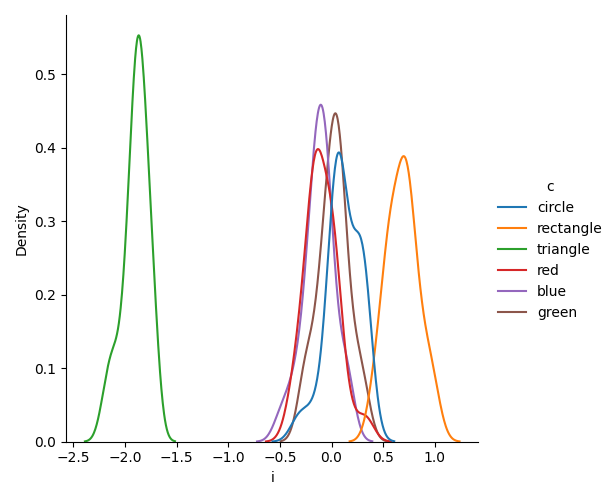

In [7]:
sns.displot(data=dfc[dfc["l"]==l], x="i", hue="c", kind="kde")

<IPython.core.display.Javascript object>


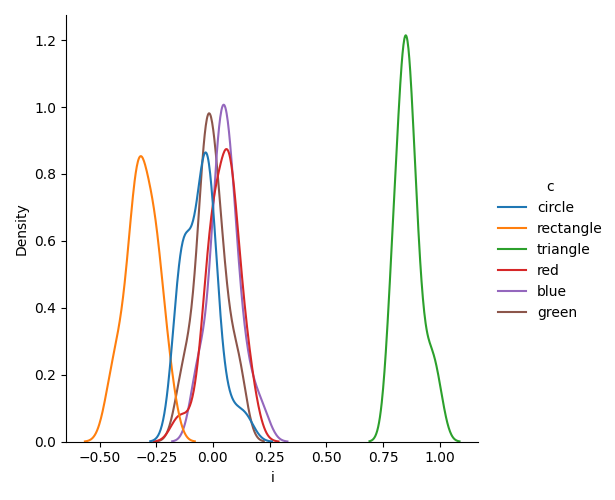

In [8]:
sns.displot(data=dfb[dfb["l"]==l], x="i", hue="c", kind="kde")

In [16]:
df_c = pd.read_csv("results/tcavs_c.csv")
df_b = pd.read_csv("results/tcavs_b.csv")

In [17]:
l = 0

<IPython.core.display.Javascript object>


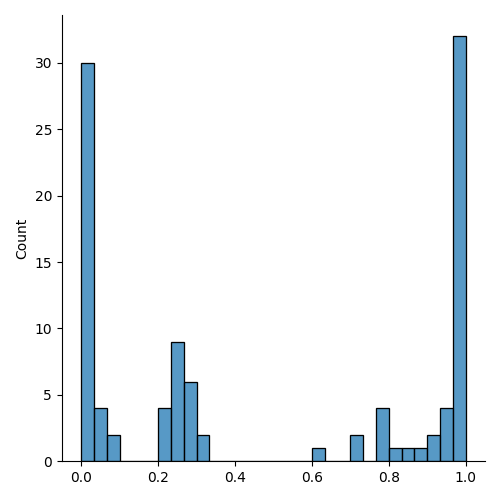

concept,circle,rectangle,triangle,red,blue,green,red_circle,red_rectangle,red_triangle,blue_circle,blue_rectangle,blue_triangle,green_circle,green_rectangle,green_triangle
bottleneck,,,,,,,,,,,,,,,
0,0.20,0.97,0.92,0.96,0.94,0.41,0.07,0.99,0.97,0.02,0.98,0.97,0.07,0.88,0.77
1,0.61,0.91,0.99,0.98,0.97,0.23,0.10,0.96,1.00,0.31,0.98,0.99,0.04,0.21,0.63
2,0.20,0.00,1.00,0.80,0.22,0.03,0.28,0.00,1.00,0.27,0.00,1.00,0.26,0.00,1.00
3,0.05,0.00,1.00,0.78,0.72,0.05,0.28,0.00,1.00,0.27,0.01,1.00,0.25,0.00,1.00
4,0.72,0.01,1.00,0.94,0.52,0.37,0.28,0.01,1.00,0.27,0.01,1.00,0.27,0.00,1.00
5,0.83,0.01,1.00,0.31,0.78,0.84,0.25,0.00,1.00,0.25,0.01,1.00,0.25,0.01,1.00
6,0.35,0.00,1.00,0.97,0.55,0.68,0.46,0.00,1.00,0.26,0.01,1.00,0.26,0.00,0.98


In [18]:
overview(df_c, order, l, 0.6)

<IPython.core.display.Javascript object>


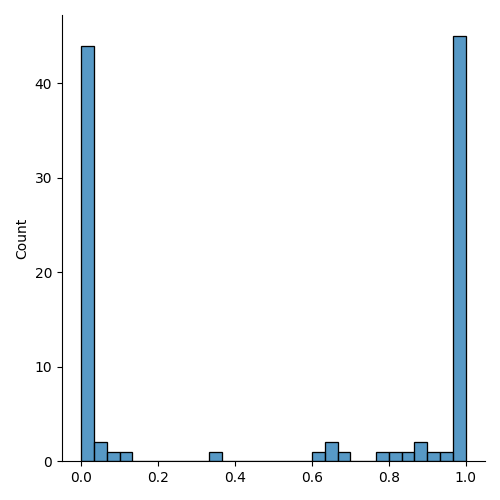

concept,circle,rectangle,triangle,red,blue,green,red_circle,red_rectangle,red_triangle,blue_circle,blue_rectangle,blue_triangle,green_circle,green_rectangle,green_triangle
bottleneck,,,,,,,,,,,,,,,
0,0.36,0.77,1.00,1.00,0.00,0.99,0.05,1.00,1.00,0.00,0.00,0.01,0.01,0.99,1.00
1,0.63,0.60,0.99,0.99,0.00,0.98,0.46,1.00,1.00,0.00,0.00,0.00,0.12,0.99,1.00
2,0.41,0.94,1.00,1.00,0.00,0.98,0.01,1.00,1.00,0.00,0.00,0.61,0.01,0.87,1.00
3,0.51,0.41,1.00,1.00,0.00,0.97,0.69,0.99,1.00,0.00,0.00,0.00,0.01,0.87,1.00
4,0.66,0.03,1.00,1.00,0.00,0.98,0.66,1.00,1.00,0.00,0.00,0.00,0.00,0.86,1.00
5,0.83,0.07,1.00,0.99,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.01,0.02,1.00,1.00
6,0.63,0.00,0.99,0.99,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.91,0.00,1.00


In [19]:
overview(df_b, order, l, 0.6)

In [43]:
with open("results/conf_c.pkl", "rb") as f:
    data = pickle.load(f)

In [46]:
table = []
for k, v in data["derivatives"].items():
    for i in v:
        table.append([k[0], k[1], k[2], i])
df = pd.DataFrame(table, columns=["t", "l", "c", "i"])
df = df[df["t"]=="2"]

df = process_df(df)

<IPython.core.display.Javascript object>


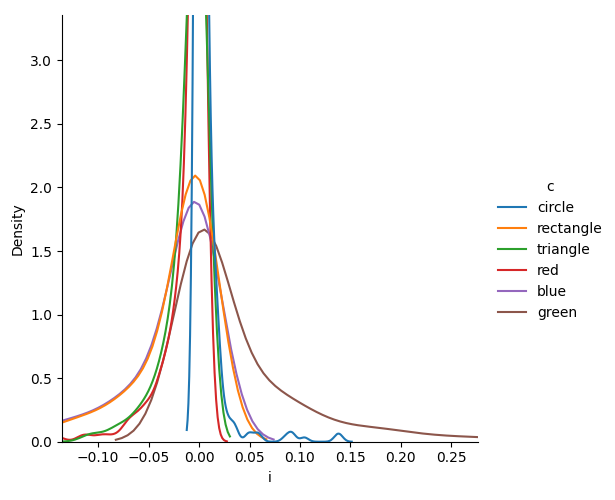

In [47]:
sns.displot(data=df[df["l"]==0], x="i", hue="c", kind="kde")